In [27]:
from numpy import *
from pylab import *
%matplotlib inline
from audio.bitstream import BitStream
from audio.coders import rice
import audio.wave

Preamble: Rice Coder
============

In [2]:
BitStream(42, uint16)

0000000000101010

In [3]:
frame = [0,0,1,1,7,255,301,16,78, 100, 0,0,0, 6]
r = rice.from_frame(frame, signed=False)
print r.b

5


In [4]:
BitStream(0,r)

000000

In [5]:
BitStream(1,r)

000010

In [6]:
BitStream(255, r)

1111111111110

In [7]:
BitStream(frame, r)

000000000000000010000010001110111111111111001101111111111010000001110110001001110000000000000000000001100

In [8]:
BitStream(1,rice(b=5,signed=True))

0000010

In [9]:
for b in range(0,9):
    print b, len(BitStream(frame, rice(signed=False, b=b)))

0 779
1 408
2 230
3 147
4 114
5 105
6 107
7 115
8 127


Rice Amplitude Coder (Audio)
================

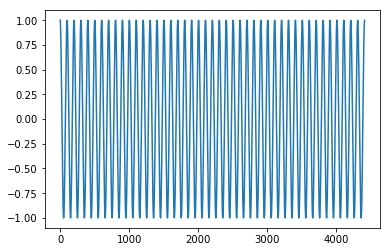

In [29]:
df = 44100.0; dt = 1.0 / df
f = 440.0
t = r_[0:0.1:dt] # 0.1 sec of data
data = cos(2*pi*f*t)
#data = audio.io.record(1.0, df=df)[0]
plot(data)
data2 = wave.read(wave.write(data))

In [30]:
data3 = wave.read(wave.write(data), scale=False)
print data3.dtype
data = data3[0]
print len(data)

int16
4410


In [31]:
r = rice.from_frame(data, signed=True) # near 15 ?
print r.b

14


In [32]:
stream = BitStream(data, r)
print len(data) * 16
print len(stream) 


70560
73510


-32768


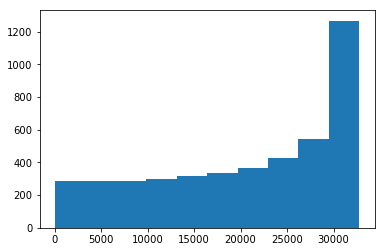

In [33]:
close()
hist(abs(data.astype(int32)))
# negative values of abs(data) ? WTF!!!
print abs(int16(-2**15)) # overflow: abs output is a int16!

59956


(array([  282.,   284.,   288.,   300.,   316.,   336.,   372.,   424.,
          544.,  1264.]),
 array([    0. ,   327.7,   655.4,   983.1,  1310.8,  1638.5,  1966.2,
         2293.9,  2621.6,  2949.3,  3277. ]),
 <a list of 10 Patch objects>)

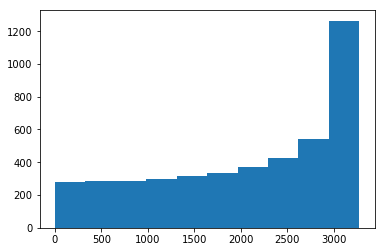

In [34]:
df = 44100.0; dt = 1.0 / df
f = 440.0
t = r_[0:0.1:dt] # 0.1 sec of data
data = 0.1*sin(2*pi*f*t)
data = wave.read(wave.write(data), scale=False)[0]
print len(BitStream(data, rice.from_frame(data, signed=True)))
hist(abs(data))

Differential Rice Coder
=============

In [16]:
df = 44100.0; dt = 1.0 / df
f = 440.0
t = r_[0:0.1:dt] # 0.1 sec of data
#data = sin(2*pi*f*t)
#data = wave.read(wave.write(data), scale=False)[0]

In [17]:
ddata = diff(data)
print len(data), len(ddata)

4410 4409


In [18]:
ddata = diff(r_[0,data]) # coding of the first value
print len(data), len(ddata)

4410 4410


(array([  281.,   288.,   288.,   300.,   312.,   340.,   384.,   412.,
          560.,  1245.]),
 array([   0. ,   20.6,   41.2,   61.8,   82.4,  103. ,  123.6,  144.2,
         164.8,  185.4,  206. ]),
 <a list of 10 Patch objects>)

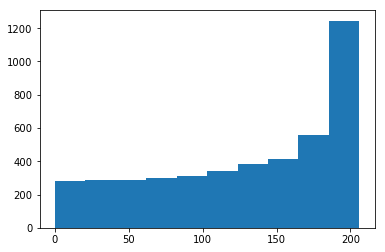

In [19]:
hist(abs(ddata))

In [20]:
r = rice.from_frame(ddata, signed=True)
print r.b
print len(BitStream(ddata, r))

6
42363


In [21]:
idata = cumsum(ddata)
all(data == idata)

True

In [22]:
dddata = diff(r_[0, diff(r_[0, data])])
r = rice.from_frame(dddata, signed=True)
print r.b
print len(BitStream(dddata, r))

3
24747


In [23]:
iidata = cumsum(cumsum(dddata))
all(data == iidata)

True